<h1><center> Assignment 2 (Part B) </center> </h1>

<h2 style="text-align:left;">
    Name: Sushovan Jena
    <span style="float:right;">
        Course: CS669
    </span>
</h2>
<h2 style="text-align:left;">
    Enroll No.: S20011
    <span style="float:right;">
         (Pattern Recognition)
    </span>
</h2>

<!-- <h2 style='text-align: left;'>Name: Sujeet Kumar </h2> <h2 style='text-align: right;'>Course: EE534 (Probability and Random Processes)</h2> -->

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import MinMaxScaler


<H1>Implementation of k-means clustering</H1>

In [2]:
def kmeans(X, k):
    diff = 1
    cluster = np.zeros(X.shape[0])

    ### Initialize k random centroids
    random_indices = np.random.choice(len(X), size=k, replace=False)
    centroids = X[random_indices, :]
    new_centroids = X[random_indices, :]
    
    min_dist = np.array([float('inf')] * X.shape[0])
    while diff:
        for i in range(k):
            ### Distance of each point from each clusters center.
            dist = np.sqrt(np.sum((X - centroids[i])**2, axis=1))

            ### Assigning the cluster index to the points where the distance is lesser than the previous assignment.
            cluster = np.where(dist < min_dist, i, cluster)
            ### Update the minimum distance for every data points.
            min_dist = np.where(dist < min_dist, dist, min_dist)
            ### Update the centroids 
            new_centroids[i] = np.mean(X[cluster == i], axis=0)

            # if centroids are same then leave
            if np.sum(centroids-new_centroids) == 0:
                diff = 0
            else:
                centroids = new_centroids
    return centroids, cluster

def normalize(img):
    scaler = MinMaxScaler()
    # fit using the train set
    scaler.fit(img)
    # transform the test test
    img_scaled = scaler.transform(img)
    return scaler, img_scaled

<H1>(i) k-means clustering-based segmentation of the given image, When using only pixel colour values as features </H1>

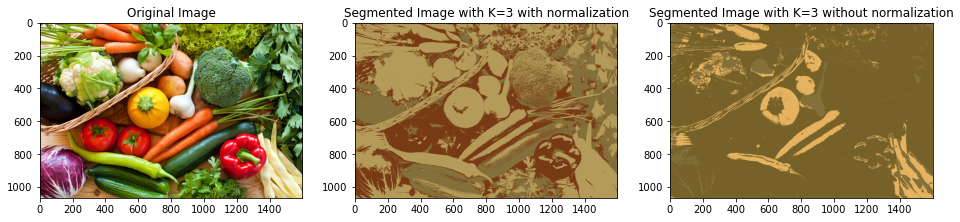

In [168]:
raw_img = Image.open('Image.jpg')
raw_img = np.asarray(raw_img, dtype="int32")
img = raw_img.reshape((-1,3))

def run_kmeans(k):
    ### With normalization
    ### Normalized Data
    scaler, img_scaled = normalize(img)
    ### Call Kmeans
    centroids, clusters = kmeans(img_scaled, k)
    ### Denormalize centroids
    centroids = scaler.inverse_transform(centroids)
    ### Showing the Original and segmented image
    fig, ax = plt.subplots(1, 3, figsize=(16, 5))
    ### Show Original Image
    ax[0].imshow(img.reshape(raw_img.shape))
    ax[0].set_title("Original Image")
    ### Segmented (Converting to 8-bits)
    centroids = np.uint8(centroids[:, :3])
    segmented_img = np.uint8(centroids[np.uint8(clusters)]).reshape(raw_img.shape)
    ### Show segmented Image
    ax[1].imshow(segmented_img)
    ax[1].set_title("Segmented Image with K={} with normalization".format(k))


    ### Without normalization
    ### Call Kmeans
    centroids, clusters = kmeans(img, k)
    ### Segmented (Converting to 8-bits)
    centroids = np.uint8(centroids[:, :3])
    segmented = np.uint8(centroids[np.uint8(clusters)]).reshape(raw_img.shape)
    ### Show segmented Image
    ax[2].imshow(segmented)
    ax[2].set_title("Segmented Image with K={} without normalization".format(k))
    

run_kmeans(3)

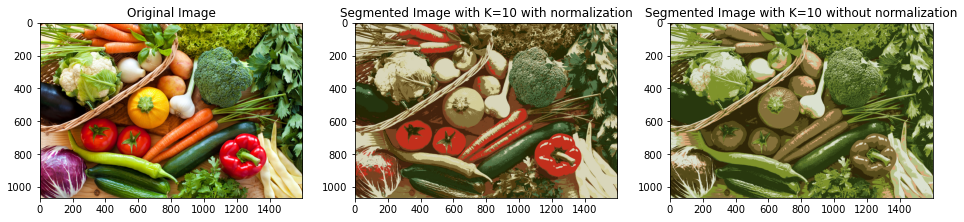

In [169]:
run_kmeans(10)

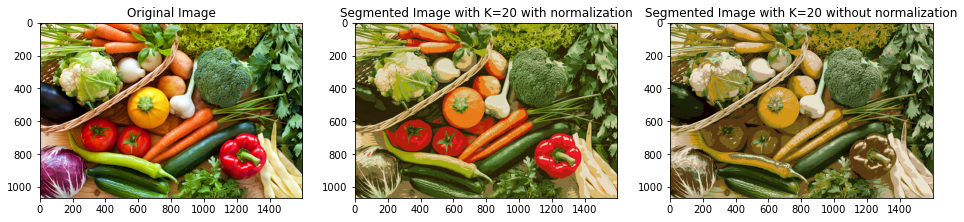

In [170]:
run_kmeans(20)

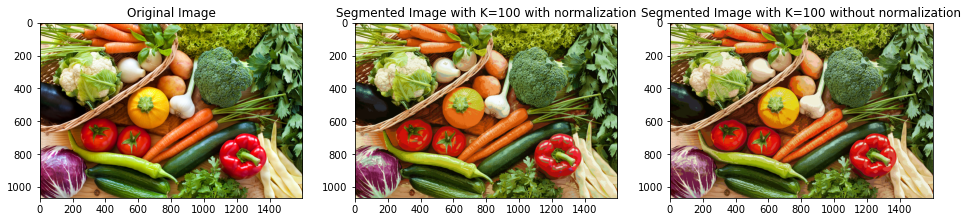

In [171]:
run_kmeans(100)

<H1>(ii) k-means clustering-based segmentation of the given image, When using both pixel colour and location values as features </H1>

1707200 (1707200, 3)


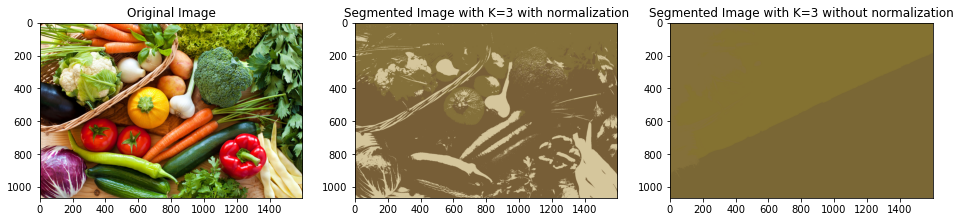

In [4]:
### Read the image file
raw_img = Image.open('Image.jpg')
raw_img = np.asarray(raw_img, dtype="int32")
h, w, _ = raw_img.shape
### Reshape the image to get and array of each [r, g, b] values
img = raw_img.reshape((-1,3))
print(h*w, img.shape)
### Adding the position as features
new_img = np.array([np.append(img[i], [i%w, i//w]) for i in range(img.shape[0])])

def run_kmeans(k):
    ### With normalization
    ### Normalized Data
    scaler, img_scaled = normalize(new_img)
    ### Call Kmeans
    centroids, clusters = kmeans(img_scaled, k)
    ### Denormalize centroids
    centroids = scaler.inverse_transform(centroids)
    ### Showing the Original and segmented image
    fig, ax = plt.subplots(1, 3, figsize=(16, 5))
    ### Show Original Image
    ax[0].imshow(img.reshape(raw_img.shape))
    ax[0].set_title("Original Image")
    ### Segmented (Converting to 8-bits)
    centroids = np.uint8(centroids[:, :3])
    segmented_img = np.uint8(centroids[np.uint8(clusters)]).reshape(raw_img.shape)
    ### Show segmented Image
    ax[1].imshow(segmented_img)
    ax[1].set_title("Segmented Image with K={} with normalization".format(k))


    ### Without normalization
    ### Call Kmeans
    centroids, clusters = kmeans(new_img, k)
    ### Segmented (Converting to 8-bits)
    centroids = np.uint8(centroids[:, :3])
    segmented = np.uint8(centroids[np.uint8(clusters)]).reshape(raw_img.shape)
    ### Show segmented Image
    ax[2].imshow(segmented)
    ax[2].set_title("Segmented Image with K={} without normalization".format(k))
    

run_kmeans(3)

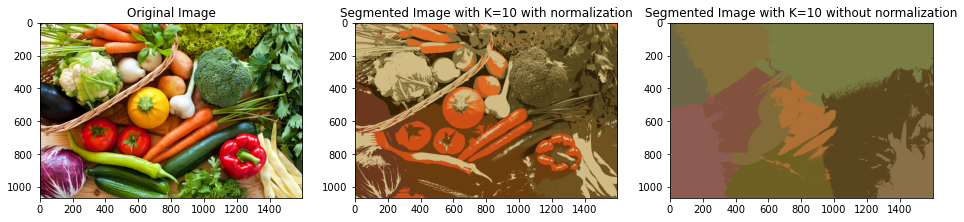

In [173]:
run_kmeans(10)

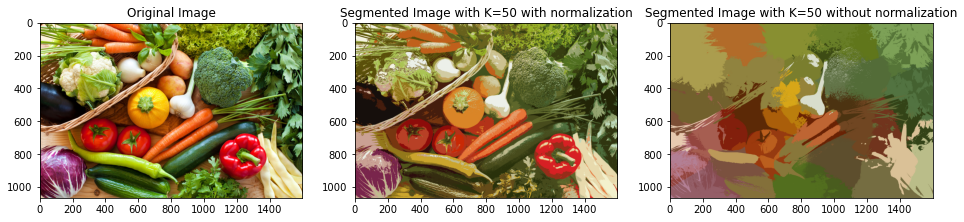

In [5]:
run_kmeans(50)